In [180]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [181]:
# Carregar o arquivo CSV
df = pd.read_csv('tempo.csv', sep=';')

# Visualizar as primeiras linhas do DataFrame
print(df.head())

  Aparencia  Temperatura  Umidade       Vento Jogar
0       sol           85     85.0       FALSO   nao
1       sol           80     90.0  VERDADEIRO   nao
2   nublado           83     86.0       FALSO   sim
3     chuva           70      NaN       FALSO   sim
4     chuva           68     80.0       FALSO   sim


In [182]:
# Verificar informações básicas sobre o DataFrame
print(df.info())

# Verificar valores nulos
print(df.isnull().sum())

# Verificar valores únicos em cada coluna
for col in df.columns:
    print(f"Valores únicos na coluna '{col}': {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes
None
Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64
Valores únicos na coluna 'Aparencia': ['sol' 'nublado' 'chuva' 'menos']
Valores únicos na coluna 'Temperatura': [  85   80   83   70   68   65   64 1220   69   75   72   81   71]
Valores únicos na coluna 'Umidade': [ 85.  90.  86.  nan  80.  70.  65.  95. 200.  75.  91.]
Valores únicos na coluna 'Vento': ['FALSO' 'VERDADEIRO' nan]
Valores únicos na coluna 'Jogar': ['nao' 'sim']


In [184]:
# Calcular a moda da coluna "Vento"
moda_vento = df['Vento'].mode()[0]

# Preencher valores nulos com a moda
df['Vento'].fillna(moda_vento, inplace=True)

Tratar os valores nulos

In [185]:
# Valores permitidos
valores_permitidos_aparencia = ['sol', 'nublado', 'chuva']

# Identificar valores inconsistentes
df['Aparencia'] = df['Aparencia'].apply(lambda x: x if x in valores_permitidos_aparencia else df['Aparencia'].mode()[0])

 Filtrar valores fora do intervalo permitido

In [186]:
# Filtrar valores válidos (-130 a 130) para calcular a média
temperatura_valida = df['Temperatura'][(df['Temperatura'] >= -130) & (df['Temperatura'] <= 130)]

# Calcular a média
media_temperatura = temperatura_valida.mean()

# Substituir valores fora do intervalo pela média
df['Temperatura'] = df['Temperatura'].apply(lambda x: media_temperatura if x < -130 or x > 130 else x)

In [188]:
# Visualizar o DataFrame tratado
print(df)

# Verificar novamente os valores nulos
print(df.isnull().sum())

   Aparencia  Temperatura  Umidade       Vento Jogar
0        sol    85.000000     85.0       FALSO   nao
1        sol    80.000000     90.0  VERDADEIRO   nao
2    nublado    83.000000     86.0       FALSO   sim
3      chuva    70.000000     82.5       FALSO   sim
4      chuva    68.000000     80.0       FALSO   sim
5      chuva    65.000000     70.0  VERDADEIRO   nao
6      chuva    64.000000     65.0  VERDADEIRO   sim
7        sol    73.692308     95.0       FALSO   nao
8        sol    69.000000     70.0       FALSO   sim
9      chuva    75.000000    100.0       FALSO   sim
10       sol    75.000000     70.0  VERDADEIRO   sim
11   nublado    72.000000     90.0  VERDADEIRO   sim
12   nublado    81.000000     75.0       FALSO   sim
13     chuva    71.000000     91.0  VERDADEIRO   nao
Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64


Análise exploratória 

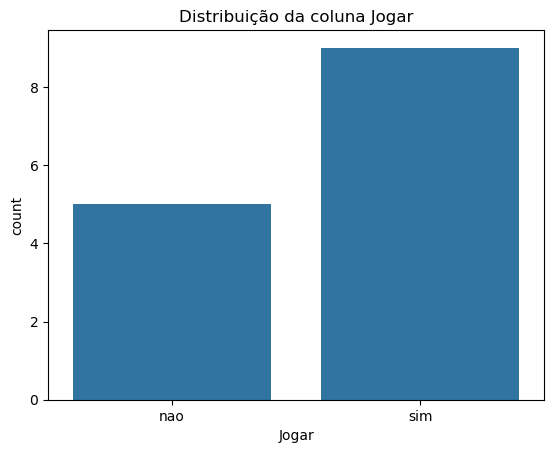

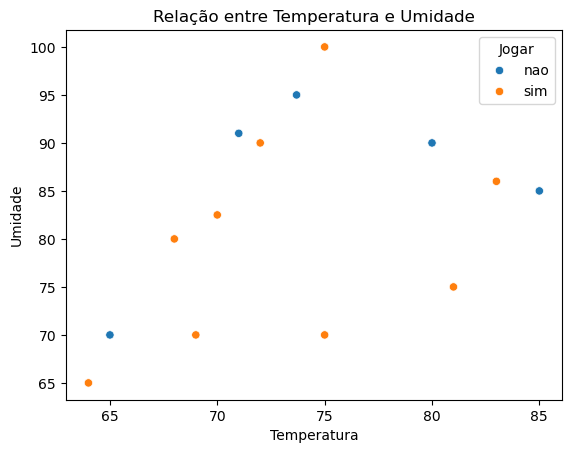

In [189]:
# Gráfico de contagem para a coluna "Jogar"
sns.countplot(data=df, x='Jogar')
plt.title('Distribuição da coluna Jogar')
plt.show()

# Gráfico de dispersão entre Temperatura e Umidade
sns.scatterplot(data=df, x='Temperatura', y='Umidade', hue='Jogar')
plt.title('Relação entre Temperatura e Umidade')
plt.show()